In [1]:
!pip install tensorflow-text

     |████████████████████████████████| 4.4 MB 13.9 MB/s 


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [4]:
import pandas as pd
df= pd.read_csv("train.csv")

In [5]:
df.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1
5,z13xit5agm2zyh4f523rst2gowmbx5bml,Lone Twistt,2013-11-28T17:34:55,Once you have started reading do not stop. If...,1
6,z13pejoiuozwxtdu323dspopnri4xts0f,Archie Lewis,2013-11-28T17:54:39,https://twitter.com/GBphotographyGB﻿,1
7,z12oglnpoq3gjh4om04cfdlbgp2uepyytpw0k,Francisco Nora,2013-11-28T19:52:35,please like :D https://premium.easypromosapp.c...,1
8,z13phrmwrkfisn5er22eyrbpbvaiwfvwf04,Gaming and Stuff PRO,2013-11-28T21:14:13,"Hello! Do you like gaming, art videos, scienti...",1
9,z13bgdvyluihfv11i22rgxwhuvabzz1os04,Zielimeek21,2013-11-28T21:49:00,I'm only checking the views﻿,0


In [6]:
df.groupby('CLASS').describe()

COMMENT_ID         ...                            CONTENT     
           count unique  ...                                top freq
CLASS                    ...                                        
0            571    571  ...                                wow    4
1            586    585  ...  Check out this video on YouTube:﻿   52

[2 rows x 16 columns]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['CONTENT'],df['CLASS'], stratify=df['CLASS'])

In [8]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [9]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'encoder_outputs':  109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [11]:
len(X_train)

867

In [12]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [15]:
model.fit(X_train, y_train, epochs=50)


Epoch 1/50
28/28 [==============================] - 17s 609ms/step - loss: 0.4173 - accuracy: 0.8466 - precision: 0.8430 - recall: 0.8565
Epoch 2/50
28/28 [==============================] - 17s 602ms/step - loss: 0.4136 - accuracy: 0.8512 - precision: 0.8491 - recall: 0.8588
Epoch 3/50
28/28 [==============================] - 17s 605ms/step - loss: 0.4115 - accuracy: 0.8362 - precision: 0.8293 - recall: 0.8519
Epoch 4/50
28/28 [==============================] - 17s 606ms/step - loss: 0.4138 - accuracy: 0.8397 - precision: 0.8304 - recall: 0.8588
Epoch 5/50
28/28 [==============================] - 17s 609ms/step - loss: 0.4021 - accuracy: 0.8570 - precision: 0.8654 - recall: 0.8497
Epoch 6/50
28/28 [==============================] - 17s 606ms/step - loss: 0.3905 - accuracy: 0.8685 - precision: 0.8652 - recall: 0.8770
Epoch 7/50
28/28 [==============================] - 17s 606ms/step - loss: 0.3937 - accuracy: 0.8535 - precision: 0.8578 - recall: 0.8519
Epoch 8/50
28/28 [================

In [16]:
model.evaluate(X_test, y_test)


10/10 [==============================] - 6s 555ms/step - loss: 0.3342 - accuracy: 0.8759 - precision: 0.8936 - recall: 0.8571


[0.3342408239841461,
 0.8758620619773865,
 0.8936170339584351,
 0.8571428656578064]

In [17]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [18]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[128,  15],
       [ 21, 126]])

Text(33.0, 0.5, 'Truth')

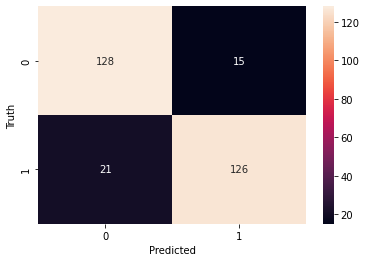

In [20]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       143
           1       0.89      0.86      0.88       147

    accuracy                           0.88       290
   macro avg       0.88      0.88      0.88       290
weighted avg       0.88      0.88      0.88       290



In [22]:
sub=pd.read_csv("test.csv")

In [23]:
sub.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿


In [24]:
s=model.predict(sub['CONTENT'])

In [28]:
#l=enumerate(s)

In [30]:
print(l)

In [25]:
k=[]
for i in s:
  if i>0.5:
    print(1)
    k.append(1)
  else:
    print(0)
    k.append(0)

1
1
1
0
1
1
1
1
1
1
0
1
0
1
0
0
0
1
1
1
1
1
1
0
0
1
1
0
0
0
0
1
1
1
0
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
1
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1
0
1
1
1
1
0
0
0
1
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
0
0
1
0
0
0
1
0
1
0
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
0
1
1
1
0
1
1
0
1
0
1
1
1
0
0
1
1
0
0
0
0
0
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
0
0
0
1


In [26]:
k

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [27]:
id=sub.ID

In [28]:
id

0        0
1        1
2        2
3        3
4        4
      ... 
794    794
795    795
796    796
797    797
798    798
Name: ID, Length: 799, dtype: int64

In [29]:
id=pd.DataFrame(id)

In [30]:
id

,ID
0,0
1,1
2,2
3,3
4,4
...,...
794,794
795,795
796,796
797,797


In [31]:
id.shape

(799, 1)

In [33]:
k.shape()

AttributeError: ignored

In [69]:
k.T

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
sb=pd.DataFrame({'ID':[id],'CLASS':[k]})

In [35]:
m=pd.DataFrame(k)

In [36]:
m

,0
0,1
1,1
2,1
3,0
4,1
...,...
794,1
795,0
796,0
797,0


In [37]:
m.columns=['CLASS']

In [38]:
m

,CLASS
0,1
1,1
2,1
3,0
4,1
...,...
794,1
795,0
796,0
797,0


In [39]:
f=pd.concat([id,m],axis=1)

In [40]:
f.set_index("ID",inplace=True)

In [41]:
f.shape

(799, 1)

In [42]:
f

,CLASS
ID,
0,1
1,1
2,1
3,0
4,1
...,...
794,1
795,0
796,0


In [43]:
f.to_csv('submission.csv')